Training using movies data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('./users.dat', sep='::', header = None, names = unames, engine='python')
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [2]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('./ratings.dat', sep='::', header = None, names=rnames, engine='python')
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
mnames = ['user_id', 'title', 'genres']
movies = pd.read_table('./movies.dat', sep='::', header=None, names=mnames, engine='python')
movies.head()

,user_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df = pd.merge(pd.merge(users, ratings), movies)
df.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,Toy Story (1995),Animation|Children's|Comedy
1,1,F,1,10,48067,661,3,978302109,Toy Story (1995),Animation|Children's|Comedy
2,1,F,1,10,48067,914,3,978301968,Toy Story (1995),Animation|Children's|Comedy
3,1,F,1,10,48067,3408,4,978300275,Toy Story (1995),Animation|Children's|Comedy
4,1,F,1,10,48067,2355,5,978824291,Toy Story (1995),Animation|Children's|Comedy


In [5]:
pattern = r"\((\d+)\)"
years = df['title'].str.findall(pattern).str[0] # need to add .str[0] to avoid making the list, findall method returns a list of all the matches
df['year'] = years

In [6]:
df['title'] = df['title'].str.replace(r"\s\(\d+\)", "", regex=True).copy() #need to add regex=True
df.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,year
0,1,F,1,10,48067,1193,5,978300760,Toy Story,Animation|Children's|Comedy,1995
1,1,F,1,10,48067,661,3,978302109,Toy Story,Animation|Children's|Comedy,1995
2,1,F,1,10,48067,914,3,978301968,Toy Story,Animation|Children's|Comedy,1995
3,1,F,1,10,48067,3408,4,978300275,Toy Story,Animation|Children's|Comedy,1995
4,1,F,1,10,48067,2355,5,978824291,Toy Story,Animation|Children's|Comedy,1995


In [7]:
title_and_year = df[['title', 'year']]
title_and_year
title_and_count = title_and_year.groupby('title')['year'].nunique()
titles_with_multiple_years = title_and_count[title_and_count > 1]
li = titles_with_multiple_years.index
title_and_count.head()

title
$1,000,000 Duck           1
'Night Mother             1
'Til There Was You        1
'burbs, The               1
...And Justice for All    1
Name: year, dtype: int64

In [8]:
ndf = df.loc[df["title"].isin(li)]
ndf = ndf.sort_values("year", ascending=True).reset_index()
ndf.head()

,index,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,year
0,526671,3310,M,45,14,12561,538,5,967989765,"Kid, The",Action,1921
1,526664,3310,M,45,14,12561,2762,5,967959783,"Kid, The",Action,1921
2,526663,3310,M,45,14,12561,2599,4,967959626,"Kid, The",Action,1921
3,526662,3310,M,45,14,12561,318,3,967959243,"Kid, The",Action,1921
4,526661,3310,M,45,14,12561,314,4,967959684,"Kid, The",Action,1921


In [9]:
boob  = ndf.groupby(['title', 'year']).size()
boob.head()

title                                       year
101 Dalmatians                              1961    272
                                            1996    211
Ballad of Narayama, The (Narayama Bushiko)  1958    506
                                            1982     31
Cape Fear                                   1962     75
dtype: int64

In [10]:
new_df = ndf.groupby(['title', 'year']).agg(mean_rating=('rating', 'mean')).reset_index()
new_df

,title,year,mean_rating
0,101 Dalmatians,1961,3.661765
1,101 Dalmatians,1996,3.777251
2,"Ballad of Narayama, The (Narayama Bushiko)",1958,3.027668
3,"Ballad of Narayama, The (Narayama Bushiko)",1982,3.870968
4,Cape Fear,1962,3.720000
...,...,...,...
75,True Crime,1999,3.779221
76,Village of the Damned,1960,4.130435
77,Village of the Damned,1995,4.283582
78,Wonderland,1997,3.888889


In [11]:
ra = new_df.iloc[0: 30]
ra.head()

,title,year,mean_rating
0,101 Dalmatians,1961,3.661765
1,101 Dalmatians,1996,3.777251
2,"Ballad of Narayama, The (Narayama Bushiko)",1958,3.027668
3,"Ballad of Narayama, The (Narayama Bushiko)",1982,3.870968
4,Cape Fear,1962,3.720000


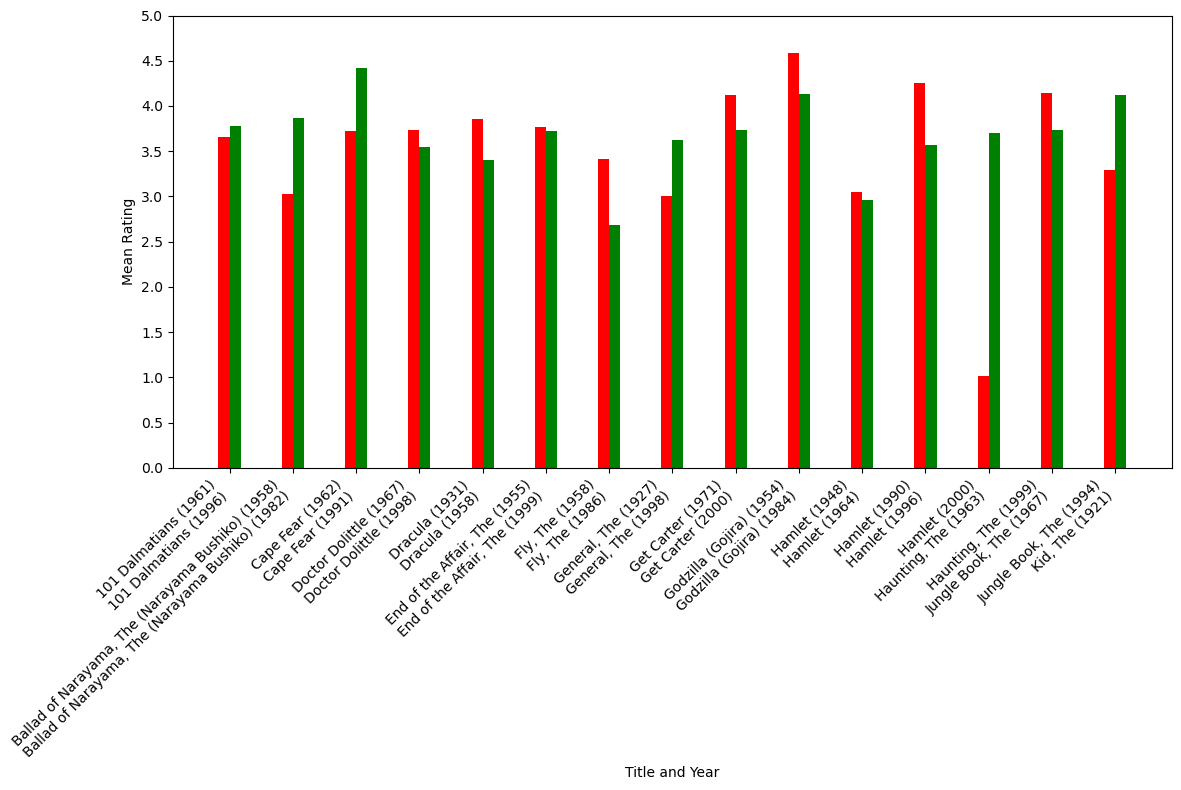

In [13]:
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True
ra['title_year'] = (ra['title'] + ' (' + ra['year'].astype(str) + ')')

fig, ax = plt.subplots(figsize=(12, 8))

# Adjust the width for better visibility of pairs
width = 0.35

# Plot bars for each pair
for i in range(len(ra) // 2):
    ax.bar(i * 2, ra.loc[i * 2, 'mean_rating'], width=width, color='red', label=ra.loc[i * 2, 'title_year'])
    ax.bar(i * 2 + width, ra.loc[i * 2 + 1, 'mean_rating'], width=width, color='green', label=ra.loc[i * 2 + 1, 'title_year'])

# Set x-axis ticks and labels
ax.set_xticks([i * 2 + width / 2 for i in range(len(ra) // 2)])
ax.set_xticklabels([f"{ra.loc[i * 2, 'title_year']}\n{ra.loc[i * 2 + 1, 'title_year']}" for i in range(len(ra) // 2)], rotation=45, ha='right')
y_ticks = [i / 2 for i in range(0, 11)]
ax.set_yticks(y_ticks)
ax.set_xlabel('Title and Year')
ax.set_ylabel('Mean Rating')

plt.tight_layout()
plt.show()